<a href="https://www.nvidia.com/dli"> <img src="images/DLI_Header.png" alt="Header" style="width: 400px;"/> </a>

# 2.0 BERT Overview
In this notebook, you'll look deeper into BERT architecture and contextualized word embeddings. You'll get a chance to visualize how words in a pretrained language model relate to each other.

**[2.1 Introduction to BERT](#2.1-Introduction-to-BERT)<br>**
**[2.2 BERT Language Model with NeMo](#2.2-BERT-Language-Model-with-NeMo)<br>**
**[2.3 The BERT WordPiece Tokenizers](#2.3-The-BERT-WordPiece-Tokenizers)<br>**
&nbsp;&nbsp;&nbsp;&nbsp;[2.3.1 Characters, Words, Subwords](#2.3.1-Characters,-Words,-Subwords)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[2.3.2 WordPiece Algorithm](#2.3.2-WordPiece-Algorithm)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[2.3.3 Tokenizer with NeMo](#2.3.3-Tokenizer-with-NeMo)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[2.3.4 Exercise: Tokenizer Index](#2.3.4-Exercise:-Tokenizer-Index)<br>
**[2.4 Contextualized Word Embedding](#2.4-Contextualized-Word-Embedding)<br>**
**[2.5 The Attention Mechanism](#2.5-The-Attention-Mechanism)<br>**


We are focusing on understanding BERT architecture in preparation for pretraining language models.  Pretraining is covered in the next notebook of this lab.  Note that the training process for even relatively small language model variants, such as BERT Base trained on Wikipedia, is very time-consuming.  This would significantly exceed the time we have for today's class. Therefore, we will only initialize the training process and will not be able to run it to completion.

The NLP fine-tuning tasks, which make use of pretrained language models, are covered in part 2 of the course.

---
# 2.1 Introduction to BERT
The Transformer model, introduced in ["Attention is All You Need!"(Vaswani et al., 2017)](https://arxiv.org/abs/1706.03762), initially for the Neural Machine Translation (NMT) task, is an encoder-decoder architecture that relies on an attention mechanism. 

**BERT**, which stands for **B**idirectional **E**ncoder **R**epresentations from **T**ransformers, is a model based on the **encoder** part of Transformer model. BERT encodes input text by mapping each word or token into a trained, contextualized representation.  

<center><figure>
    <img src="images/From_Transformer_To_Bert_architecture.png">
    <figcaption>Figure 1. Image Credit: <a href="https://arxiv.org/abs/1706.03762">Attention is All You Need</a></figcaption>
</figure></center>

In particular, the BERT model takes, as input, two sentences separated by a special token [SEP], and is pretrained using two loss functions:
 - Masked-language model prediction 
 - Next sentence prediction

To convert raw text into a numerical representation, the BERT model uses a subword tokenization algorithm named WordPiece. 

BERT is often used as a language model encoder. Its pretrained checkpoint is extended with additional layers, which are task specific (see Figure 2). They are then fine-tuned on downstream tasks such as token classification (named entity recognition), text classification, question answering, and so on.

<center><figure>
    <img src="images/BERT.PNG">
    <figcaption>Figure 2. Image credit: <a href="https://arxiv.org/pdf/1810.04805.pdf">BERT: Pre-training of Deep Bidirectional Transformers for
        Language Understanding</a>.</figcaption>
</figure></center>

---
# 2.2 BERT Language Model with NeMo

BERT is a widely used neural network, with countless implementations and publicly available pretrained checkpoints. 

In our examples, we'll use BERT pretrained models from the [NVIDIA NeMo \(Neural Modules\) Toolkit](https://docs.nvidia.com/deeplearning/nemo/user-guide/docs/en/stable/core/core.html#neural-modules).  NeMo is a deep learning framework based on [PyTorch Lightning](https://github.com/PyTorchLightning/pytorch-lightning).  NeMo will be covered in depth in the Part 2 lab, but for now we'll just jump right in. We will begin by importing the necessary dependencies and listing the variants of BERT available to us.

In [1]:
# Import nemo nlp collection 
from nemo.collections import nlp as nemo_nlp

# Import BERT
from nemo.collections.nlp.models import BERTLMModel

In [2]:
# Check the list of pre-trained BERT language models
BERTLMModel.list_available_models()

[PretrainedModelInfo(
 	pretrained_model_name=bertbaseuncased,
 	description=The model was trained EN Wikipedia and BookCorpus on a sequence length of 512.,
 	location=https://api.ngc.nvidia.com/v2/models/nvidia/nemo/bertbaseuncased/versions/1.0.0rc1/files/bertbaseuncased.nemo
 ),
 PretrainedModelInfo(
 	pretrained_model_name=bertlargeuncased,
 	description=The model was trained EN Wikipedia and BookCorpus on a sequence length of 512.,
 	location=https://api.ngc.nvidia.com/v2/models/nvidia/nemo/bertlargeuncased/versions/1.0.0rc1/files/bertlargeuncased.nemo
 )]

There are two pretrained BERT language models available with NeMo: 
- `bertbaseuncased` model has 110 millions parameters in total with 12 Transformer blocks.
- `bertlargeuncased` model has 340 millions parameters in total with 24 Transformer blocks.

For the sake of time and simplicity, we'll download the smaller variant, BERT Base. This could take a minute or two.

In [3]:
# Download the pretrained BERT-based model
pretrained_model_name="bertbaseuncased"
model = BERTLMModel.from_pretrained(pretrained_model_name)

[NeMo I 2025-05-27 21:41:25 cloud:66] Downloading from: https://api.ngc.nvidia.com/v2/models/nvidia/nemo/bertbaseuncased/versions/1.0.0rc1/files/bertbaseuncased.nemo to /root/.cache/torch/NeMo/NeMo_1.0.1/bertbaseuncased/a88245d85161094369a11077be3e99be/bertbaseuncased.nemo
[NeMo I 2025-05-27 21:41:28 common:675] Instantiating model from pre-trained checkpoint


[NeMo W 2025-05-27 21:41:31 modelPT:137] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    data_file: /home/yzhang/data/nlp/bert/47316/hdf5/lower_case_1_seq_len_512_max_pred_80_masked_lm_prob_0.15_random_seed_12345_dupe_factor_5_shard_1472_test_split_10/books_wiki_en_corpus/training/
    max_predictions_per_seq: 80
    batch_size: 16
    shuffle: true
    num_samples: -1
    num_workers: 2
    drop_last: false
    pin_memory: false
    


Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
[NeMo W 2025-05-27 21:41:39 modelPT:640] Trainer wasn't specified in model constructor. Make sure that you really wanted it.


[NeMo I 2025-05-27 21:41:39 modelPT:748] Optimizer config = AdamW (
    Parameter Group 0
        amsgrad: False
        betas: (0.9, 0.999)
        eps: 1e-08
        lr: 4.375e-05
        weight_decay: 0.01
    )


[NeMo W 2025-05-27 21:41:39 lr_scheduler:600] Neither `max_steps` nor `iters_per_batch` were provided to `optim.sched`, cannot compute effective `max_steps` !
    Scheduler will not be instantiated !


[NeMo I 2025-05-27 21:41:41 modelPT:434] Model BERTLMModel was successfully restored from /root/.cache/torch/NeMo/NeMo_1.0.1/bertbaseuncased/a88245d85161094369a11077be3e99be/bertbaseuncased.nemo.


Execute the next cell to inspect the architecture of the model. Please compare the output listed with Figure 1. 
* Can you identify all of the layers? 
* How many Transformer layers does BERT Base have? 
* How big is the hidden layer size? Can you identify the Key, Value and Query matrices? 
* Can you find two loss components, one responsible for Next Sentence Prediction and one for the Masked Language Model?

In [4]:
# Check the model architecture
model

BERTLMModel(
  (bert_model): BertEncoder(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affin

Inspect the size of the model.

In [5]:
# number of weights
print(" Number of weights : ",model.num_weights)

 Number of weights :  110697020


# 2.3 The BERT WordPiece Tokenizers

Tokenization is an important data preprocessing step that consists of converting text raw data into discrete numerical representations required for the neural language model. There are several tokenizer algorithms that split the text into tokens based on rules for characters, words, or subwords. The size of the vocabulary is determined by the algorithm and dependent upon the frequency of tokens found in the text corpus.

## 2.3.1 Characters, Words, Subwords
Tokenization splits a word, phrase, or larger text section into individual characters, words, or subwords.  For example, the word "tokenization" could be split in a number of ways:

* Characters: 't', 'o', 'k', 'e', 'n', 'i', 'z', 'a', 't', 'i', 'o', 'n'
* Words: 'tokenization'
* Subwords: 'token', '##ization'

The idea is to create a vocabulary of tokens from a text corpus, which can then be trained in a language model to characterize language relationships between the tokens.  Whether this is done by character, word, or subword affects the complexity of the problem.

Tokenization by characters has the advantage of a very limited number of tokens to deal with, but these few tokens are not very meaningful by themselves and long sequences of tokens are required to represent text.  Tokenization by words results in a very large vocabulary size and requires separate tokens for very similar words, which in turn requires more training to determine their relationships to each other.

Tokenization by subwords is a solution that tries to balance these two. For example, the word "token" is a subword for "tokenization", "tokens", and "tokenize".  By splitting the words, the model learns similar meanings from the same root word more easily.  The size of the overall vocabulary required for understanding is less than required for word tokenization.

## 2.3.2 WordPiece Algorithm
The WordPiece algorithm was introduced in [this paper by Schuster and Nakajima](https://static.googleusercontent.com/media/research.google.com/ja//pubs/archive/37842.pdf).  To begin, the training data (corpus) is chosen, as well as the subword vocabulary size desired.   The algorithm iteratively determines optimal subwords for the body of text and creates the vocabulary with assigned values.  The iterative steps are:

1. Split words into sequences of character tokens.
2. Build the language model on the training data using tokens from previous step.
3. Generate new unit tokens by combining two tokens with high likelihood in the language model and add the new token(s) to the vocabulary.
4. Repeat from step 2 until the token limit for the desired vocabulary is reached or the likelihood falls below some desired threshold

## 2.3.3 Tokenizer with NeMo

In [6]:
# Check available tokenizers
nemo_nlp.modules.get_tokenizer_list()

['sentencepiece',
 'char',
 'word',
 'xlm-roberta-base',
 'cl-tohoku/bert-base-japanese-whole-word-masking',
 'facebook/s2t-small-librispeech-asr',
 'xlm-roberta-large-finetuned-conll03-german',
 'google/tapas-base-finetuned-sqa',
 'layoutlm-base-uncased',
 'xlm-mlm-enfr-1024',
 'bert-base-cased-finetuned-mrpc',
 'google/electra-base-discriminator',
 'facebook/dpr-ctx_encoder-single-nq-base',
 'umberto-commoncrawl-cased-v1',
 'bert-large-uncased-whole-word-masking-finetuned-squad',
 'biomegatron-bert-345m-cased',
 'xlm-mlm-ende-1024',
 'xlm-roberta-large-finetuned-conll03-english',
 'flaubert/flaubert_large_cased',
 'xlnet-base-cased',
 'bert-large-uncased',
 'xlm-mlm-17-1280',
 'google/bigbird-roberta-base',
 'distilgpt2',
 'allenai/longformer-large-4096',
 'facebook/dpr-ctx_encoder-multiset-base',
 'google/electra-small-discriminator',
 'funnel-transformer/intermediate-base',
 'microsoft/xprophetnet-large-wiki100-cased',
 'allenai/longformer-base-4096',
 'xlm-mlm-100-1280',
 'funnel-

In [7]:
# Get the bert-base-uncased tokenizer 
tokenizer_uncased = nemo_nlp.modules.get_tokenizer(tokenizer_name="bert-base-uncased")

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Using bos_token, but it is not set yet.
Using eos_token, but it is not set yet.


In [8]:
# Check the vocabulary size
print(" The vocabulary size: ", tokenizer_uncased.vocab_size)

 The vocabulary size:  30522


In [9]:
SAMPLES_TEXT_1 = "Hello, my name is John. I live in Santa Clara."

In [10]:
output_uncased=tokenizer_uncased.text_to_tokens(SAMPLES_TEXT_1)
print("Input sentence: ", SAMPLES_TEXT_1)
print("Tokenized sentence: ", output_uncased)

Input sentence:  Hello, my name is John. I live in Santa Clara.
Tokenized sentence:  ['hello', ',', 'my', 'name', 'is', 'john', '.', 'i', 'live', 'in', 'santa', 'clara', '.']


Now, let's use the `bert-base-cased` tokenizer to encode the sentence, "Hello, my name is John. I live in Santa Clara".

In [11]:
# Get the bert-base-cased tokenizer 
tokenizer_cased = nemo_nlp.modules.get_tokenizer(tokenizer_name="bert-base-cased")

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/213k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/436k [00:00<?, ?B/s]

Using bos_token, but it is not set yet.
Using eos_token, but it is not set yet.


In [12]:
# Encode the text 
output_cased=tokenizer_cased.text_to_tokens(SAMPLES_TEXT_1)
print("Input sentence: ", SAMPLES_TEXT_1)
print("Tokenized sentence: ", output_cased)

Input sentence:  Hello, my name is John. I live in Santa Clara.
Tokenized sentence:  ['Hello', ',', 'my', 'name', 'is', 'John', '.', 'I', 'live', 'in', 'Santa', 'Clara', '.']


The BERT model does not accept text inputs, but rather their numerical index representations.

We can check the vocabulary index of a word using the `tokenizer.text_to_ids()` function. 

Try it with the `bert-base-cased` tokenizer.

In [13]:
# Index of the tokens Hello and hello using bert-base-cased tokenizer
print("Index of Hello: ", tokenizer_cased.text_to_ids("Hello"))
print("Index of hello: ",tokenizer_cased.text_to_ids("hello"))

Index of Hello:  [8667]
Index of hello:  [19082]


In [14]:
# Example of bert-base-cased tokenizer in a sentence
print("Input sentence: ", SAMPLES_TEXT_1)
print("Tokenized sentence: ", output_cased)
print("Tokenized sentence: ", tokenizer_cased.text_to_ids(SAMPLES_TEXT_1))

Input sentence:  Hello, my name is John. I live in Santa Clara.
Tokenized sentence:  ['Hello', ',', 'my', 'name', 'is', 'John', '.', 'I', 'live', 'in', 'Santa', 'Clara', '.']
Tokenized sentence:  [8667, 117, 1139, 1271, 1110, 1287, 119, 146, 1686, 1107, 3364, 10200, 119]


## 2.3.4 Exercise: Tokenizer Index
We've already set up `tokenizer_uncased` earlier in the notebook. In the cell below, print the index for "hello" and "Hello" for `bert-base-uncased`.  If you get stuck, check the [solution](solutions/ex2.3.4.ipynb).

In [15]:
#solution
# Index of the tokens Hello and hello using bert-base-uncased tokenizer
print("Index of Hello: ", tokenizer_uncased.text_to_ids("Hello"))
print("Index of hello: ",tokenizer_uncased.text_to_ids("hello"))

Index of Hello:  [7592]
Index of hello:  [7592]


---
# 2.4 Contextualized Word Embedding

The BERT model, once trained, provides relationships between the tokenized words, based on their use together in the language corpus.  These relationships are defined within the hidden states of the neural network, the _contextualized word embeddings_.  It is these relationships that can be used to solve NLP tasks such as text classification, named entity recognition, question answering, and so on.  
To visualize the embeddings, let's start with a sentence that uses the word "mouse" in more than one way, and see what a pretrained model can make of it.

In [16]:
import torch

# Set up the sentence we want to look at
TEXT = "Last night, my wireless mouse was eaten by an animal such as mouse or rat. I need to order a new optical computer mouse."
input_sentence=torch.tensor([tokenizer_uncased.tokenizer(TEXT).input_ids]).cuda()
attention_mask=torch.tensor([tokenizer_uncased.tokenizer(TEXT).attention_mask]).cuda()

In [17]:
# Show the tokenization for the sentence
print("Input sentence: ", TEXT)
output_uncased=tokenizer_uncased.ids_to_tokens(tokenizer_uncased.tokenizer(TEXT).input_ids)
print("Tokenized sentence: ", output_uncased)

# "mouse" tokens positions in the TEXT input
mouse_computer_1=6
mouse_animal=14
mouse_computer_2=26

Input sentence:  Last night, my wireless mouse was eaten by an animal such as mouse or rat. I need to order a new optical computer mouse.
Tokenized sentence:  ['[CLS]', 'last', 'night', ',', 'my', 'wireless', 'mouse', 'was', 'eaten', 'by', 'an', 'animal', 'such', 'as', 'mouse', 'or', 'rat', '.', 'i', 'need', 'to', 'order', 'a', 'new', 'optical', 'computer', 'mouse', '.', '[SEP]']


In [18]:
# Get the embeddings for the pretrained model
hidden_states = model.bert_model(input_ids=input_sentence, token_type_ids=None, attention_mask=attention_mask)

In [19]:
from numpy import dot
from numpy.linalg import norm

def similarity_cosine(x,y):
    return dot(x,y)/(norm(x)*norm(y))

We can visualize text token embeddings obtained from the BERT models if we first reduce the dimensionality to 2D. 
[t-SNE](https://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf) is a dimensionality reduction technique widely used for vector visualization in 2D or 3D, as it preserves the neighborhood distances.

This figure shows an example of a plot with the TEXT token BERT embeddings after dimensionality reduction to 2D dimensions using t-SNE.
<img src="images/Embeddings.PNG" width=800>

Try it yourself!  

The following codeblock uses the [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) implementation of the t-SNE algorithm to reduce the dimensionality of BERT text token embeddings from 768 to 2, and plots the 2D vectors. Note that as t-SNE is a stochastic process, the low dimensional embeddings will vary from one run to another. However, the neighborhood distances of tokens should remain more or less the same. 

In [20]:
from sklearn.manifold import TSNE
import numpy as np

X=hidden_states.cpu().detach().numpy()
X_embedded = TSNE(n_components=2,metric='euclidean',  init='random', perplexity=7).fit_transform(X[0])
Tokens=tokenizer_uncased.ids_to_tokens(tokenizer_uncased.tokenizer(TEXT).input_ids)

# Annotate the different mouse tokens
Tokens[mouse_computer_1]="mouse_computer_1"
Tokens[mouse_animal]="mouse_animal"
Tokens[mouse_computer_2]="mouse_computer_2"

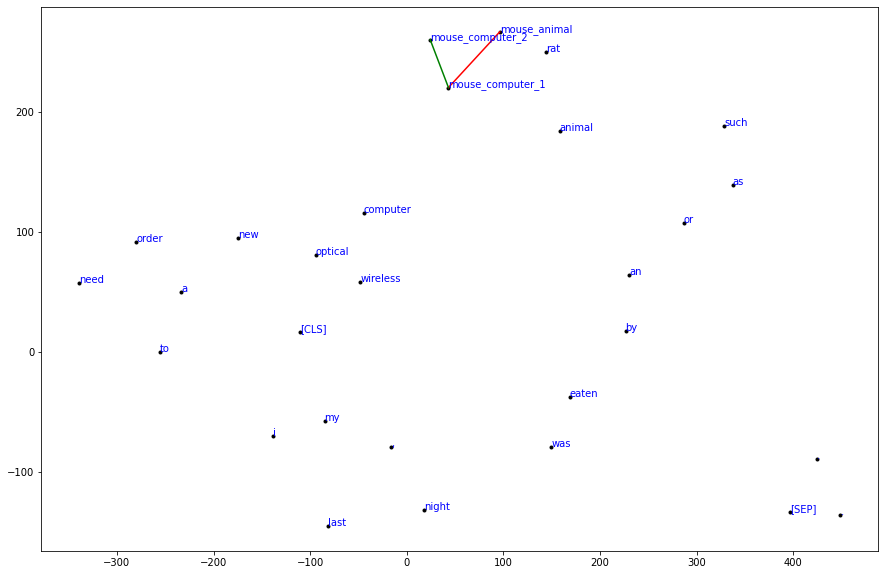

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(15,10))
plt.plot(X_embedded[:,0],X_embedded[:,1], '.', color='black')
plt.plot([X_embedded[6,0],X_embedded[14,0]],[X_embedded[6,1],X_embedded[14,1]],color='red')
plt.plot([X_embedded[6,0],X_embedded[26,0]],[X_embedded[6,1],X_embedded[26,1]],color='green')

for i, txt in enumerate(Tokens):
    plt.annotate(txt, (X_embedded[i,0], X_embedded[i,1]), color='blue')

---
# 2.5 The Attention Mechanism

As discussed in the previous notebook on the Transformer architecture, the attention mechanism allows our model to *attend*, or focus, on certain parts of the sequence, assigning higher values to parts that are more related. Despite being inspired by the human attention mechanism, the implementation in Transformers is rather simple.  It consists of multiplying our Key and Query matrices. It also involves multiple heads per layer (12 heads per layer for BERT Base), none of which are in any way conditioned to provide human-interpretable results. As a consequence, interpreting the attention mechanism can be challenging.  The neural network, across all of its layers and all of the heads, learns a very large number of text interactions and patters. We will try to visualize it, nevertheless using a tool called [BertViz](https://github.com/jessevig/bertviz).

In this section, we will deliberately construct sentences that have complex, multi-token terms, like "european economic area" (reference: https://www.gov.uk/eu-eea), to exaggerate some of the attention mechanisms.

In [22]:
from visualization import head, KVQ

In [23]:
sentence_a = "The European Union (EU) is an economic and political union of 27 countries."
sentence_b = "The European Economic Area (EEA) The EEA includes EU countries and also Iceland, Liechtenstein and Norway."

In [ ]:
# Run the head attention visualization tool - this may take a few minutes
head.berthead(sentence_a,sentence_b)

In [ ]:
# Run the KVQ matrix visualization tool - this may take a few minutes
KVQ.bertKVQ(sentence_a, sentence_b)

---
<h2 style="color:green;">Congratulations!</h2>

You've learned that 
* BERT is a language model based on the Transformer encoder
* The WordPiece tokenizer converts subwords to mathematical representations
* The relationship between words in a BERT model can be visualized by reducing the embeddings to two dimensions and plotting them
* The attention mechanism focuses on certain parts of a sequence by assigning higher values

Next, you'll learn the basics of how to tokenize and train a BERT model.  Move on to  [3.0 Pretraining Language Models](030_PretrainingLM.ipynb).

<a href="https://www.nvidia.com/dli"> <img src="images/DLI_Header.png" alt="Header" style="width: 400px;"/> </a>